<a href="https://colab.research.google.com/github/sunshineluyao/ESG_TwoSources/blob/main/Regression/ESG_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
import pandas as pd
import numpy as np

In [129]:
pip install pingouin

In [130]:
df = pd.read_csv('https://raw.githubusercontent.com/sunshineluyao/ESG_TwoSources/main/Regression/Reg_Table.csv')
df.head()

,Month,Ticker,Company_name,Stock_exchange,Industry,SIC_Code,SIC_2,GDWL,Intang_Other,Intang_Ratio,Num_Analyst,BMR,HML,Mom,SMB,Sale,Total_Industry_Sale,MktShare,Cash_STI,Asset,ROA,Cash_Dividend,Net_Income,LTDebt,STDebt,Inst_Owner,COGS,INVT,Invt_Turn,Industry_Adjusted_InvTurn,R_D,SGA,Cash,Share_Outstanding,Price_Close,Size,IdioRisk,ESG_Rating,ESG_Score,Monthly_Return,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53,Unnamed: 54,Unnamed: 55
0,1.0,WRLD,World Acceptance Corp,NASDAQ,Finance,6141.0,61.0,7.034,15.340,0.026169,4.0,-0.141200,-0.140407,-0.280740,-0.504838,544.543,90719.806,0.006002,9.335,854.988,0.084239,0.000,37.235,251.940,0.000,0.911848,428.594,0.000,0.000000,0.000000,0.0,290.397,9.335,9.284,102.26,949.38184,0.134737,B,2.4,0.081015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.0,NMIH,NMI Holdings Inc,NASDAQ,Finance,6331.0,63.0,3.244,0.390,0.002663,13.0,-0.447263,0.700125,-0.032356,0.443825,378.771,1595028.460,0.000237,180.202,1364.818,0.108639,0.000,171.957,153.166,0.000,0.974362,132.077,0.000,0.000000,0.000000,0.0,0.000,41.089,68.358,33.18,2268.11844,0.095876,B,2.5,-3.797472,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.0,NWE,NorthWestern Corp,NASDAQ,Utilities,4911.0,49.0,357.586,0.000,0.060498,8.0,0.075134,-0.237418,0.129247,-0.158067,1257.910,405761.071,0.003100,12.070,5910.702,0.032014,115.127,202.120,2253.023,3.855,0.987411,808.137,53.925,14.986314,0.986860,0.0,0.000,5.145,50.452,71.67,3615.89484,0.048562,BB,4.0,7.395005,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.0,TTMI,TTM Technologies Inc,NASDAQ,Technology,3672.0,36.0,774.791,332.008,0.310817,8.0,0.409873,-0.093515,-0.348365,0.999915,2689.308,614081.750,0.004379,400.154,3560.933,0.055641,0.000,41.301,1242.479,258.153,1.104333,2116.229,122.019,17.343438,3.829659,0.0,215.902,400.154,105.510,15.05,1587.92550,0.084532,BBB,4.3,-4.385382,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.0,WYNN,Wynn Resorts Ltd,NASDAQ,Consumer Services,7999.0,79.0,0.000,146.414,0.010555,18.0,0.255493,-1.218142,-1.012745,0.151828,6611.099,28340.551,0.233273,2351.904,13871.281,0.031831,0.000,122.985,10256.924,342.933,0.733593,4067.053,88.519,45.945537,0.383312,0.0,1006.864,2351.904,107.364,138.87,14909.63868,0.098147,CCC,0.6,-9.152436,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [131]:

df.columns

Index(['Month', 'Ticker', 'Company_name', 'Stock_exchange', 'Industry',
       'SIC_Code', 'SIC_2', 'GDWL', 'Intang_Other', 'Intang_Ratio',
       'Num_Analyst', 'BMR', 'HML', 'Mom', 'SMB', 'Sale',
       'Total_Industry_Sale', 'MktShare', 'Cash_STI', 'Asset', 'ROA',
       'Cash_Dividend', 'Net_Income', 'LTDebt', 'STDebt', 'Inst_Owner', 'COGS',
       'INVT', 'Invt_Turn', 'Industry_Adjusted_InvTurn', 'R_D', 'SGA', 'Cash',
       'Share_Outstanding', 'Price_Close', 'Size', 'IdioRisk', 'ESG_Rating',
       'ESG_Score', 'Monthly_Return', 'Unnamed: 40', 'Unnamed: 41',
       'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45',
       'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49',
       'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53',
       'Unnamed: 54', 'Unnamed: 55'],
      dtype='object')

In [132]:

# install the software
import pingouin as pg

In [133]:

#install the package
import seaborn as sns

# Linear Regression

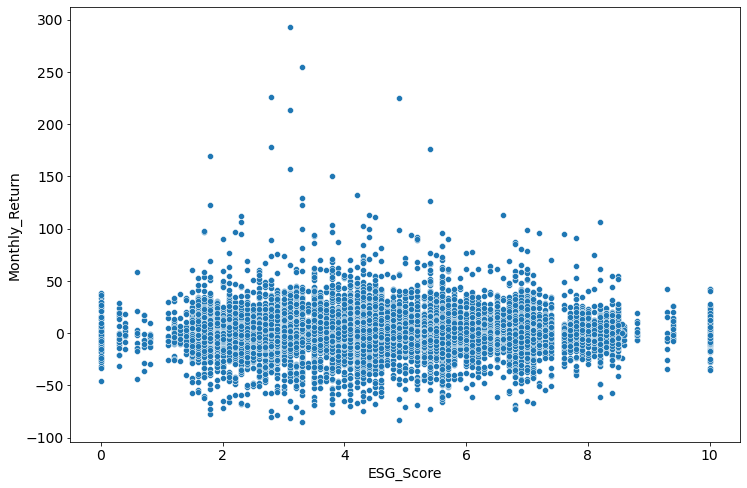

In [134]:
x='ESG_Score'
y='Monthly_Return'
sns.scatterplot(data=df, x=x, y=y)

In [135]:
import statsmodels.api as sm

In [136]:
# define the dependent and independent variables
df=df[['Monthly_Return','ESG_Score','GDWL', 'Intang_Other', 'Intang_Ratio','Num_Analyst', 'BMR', 'HML', 'Mom', 'SMB', 'Sale','Total_Industry_Sale', 'MktShare', 'Cash_STI', 'Asset', 'ROA','Cash_Dividend', 'Net_Income', 'LTDebt', 'STDebt', 'Inst_Owner', 'COGS','INVT', 'Invt_Turn', 'Industry_Adjusted_InvTurn', 'R_D', 'SGA', 'Cash','Share_Outstanding', 'Price_Close', 'Size', 'IdioRisk']]
df = df.dropna()
df.head()

,Monthly_Return,ESG_Score,GDWL,Intang_Other,Intang_Ratio,Num_Analyst,BMR,HML,Mom,SMB,Sale,Total_Industry_Sale,MktShare,Cash_STI,Asset,ROA,Cash_Dividend,Net_Income,LTDebt,STDebt,Inst_Owner,COGS,INVT,Invt_Turn,Industry_Adjusted_InvTurn,R_D,SGA,Cash,Share_Outstanding,Price_Close,Size,IdioRisk
0,0.081015,2.4,7.034,15.340,0.026169,4.0,-0.141200,-0.140407,-0.280740,-0.504838,544.543,90719.806,0.006002,9.335,854.988,0.084239,0.000,37.235,251.940,0.000,0.911848,428.594,0.000,0.000000,0.000000,0.0,290.397,9.335,9.284,102.26,949.38184,0.134737
1,-3.797472,2.5,3.244,0.390,0.002663,13.0,-0.447263,0.700125,-0.032356,0.443825,378.771,1595028.460,0.000237,180.202,1364.818,0.108639,0.000,171.957,153.166,0.000,0.974362,132.077,0.000,0.000000,0.000000,0.0,0.000,41.089,68.358,33.18,2268.11844,0.095876
2,7.395005,4.0,357.586,0.000,0.060498,8.0,0.075134,-0.237418,0.129247,-0.158067,1257.910,405761.071,0.003100,12.070,5910.702,0.032014,115.127,202.120,2253.023,3.855,0.987411,808.137,53.925,14.986314,0.986860,0.0,0.000,5.145,50.452,71.67,3615.89484,0.048562
3,-4.385382,4.3,774.791,332.008,0.310817,8.0,0.409873,-0.093515,-0.348365,0.999915,2689.308,614081.750,0.004379,400.154,3560.933,0.055641,0.000,41.301,1242.479,258.153,1.104333,2116.229,122.019,17.343438,3.829659,0.0,215.902,400.154,105.510,15.05,1587.92550,0.084532
4,-9.152436,0.6,0.000,146.414,0.010555,18.0,0.255493,-1.218142,-1.012745,0.151828,6611.099,28340.551,0.233273,2351.904,13871.281,0.031831,0.000,122.985,10256.924,342.933,0.733593,4067.053,88.519,45.945537,0.383312,0.0,1006.864,2351.904,107.364,138.87,14909.63868,0.098147


In [137]:
X =df[['ESG_Score','GDWL', 'Intang_Other', 'Intang_Ratio','Num_Analyst', 'BMR', 'HML', 'Mom', 'SMB', 'Sale','Total_Industry_Sale', 'MktShare', 'Cash_STI', 'Asset', 'ROA','Cash_Dividend', 'Net_Income', 'LTDebt', 'STDebt', 'Inst_Owner', 'COGS','INVT', 'Invt_Turn', 'Industry_Adjusted_InvTurn', 'R_D', 'SGA', 'Cash','Share_Outstanding', 'Price_Close', 'Size', 'IdioRisk']]
y=df['Monthly_Return']

In [138]:
# add a constant to the dependent variables
X= sm.add_constant(X)
X.head()

,const,ESG_Score,GDWL,Intang_Other,Intang_Ratio,Num_Analyst,BMR,HML,Mom,SMB,Sale,Total_Industry_Sale,MktShare,Cash_STI,Asset,ROA,Cash_Dividend,Net_Income,LTDebt,STDebt,Inst_Owner,COGS,INVT,Invt_Turn,Industry_Adjusted_InvTurn,R_D,SGA,Cash,Share_Outstanding,Price_Close,Size,IdioRisk
0,1.0,2.4,7.034,15.340,0.026169,4.0,-0.141200,-0.140407,-0.280740,-0.504838,544.543,90719.806,0.006002,9.335,854.988,0.084239,0.000,37.235,251.940,0.000,0.911848,428.594,0.000,0.000000,0.000000,0.0,290.397,9.335,9.284,102.26,949.38184,0.134737
1,1.0,2.5,3.244,0.390,0.002663,13.0,-0.447263,0.700125,-0.032356,0.443825,378.771,1595028.460,0.000237,180.202,1364.818,0.108639,0.000,171.957,153.166,0.000,0.974362,132.077,0.000,0.000000,0.000000,0.0,0.000,41.089,68.358,33.18,2268.11844,0.095876
2,1.0,4.0,357.586,0.000,0.060498,8.0,0.075134,-0.237418,0.129247,-0.158067,1257.910,405761.071,0.003100,12.070,5910.702,0.032014,115.127,202.120,2253.023,3.855,0.987411,808.137,53.925,14.986314,0.986860,0.0,0.000,5.145,50.452,71.67,3615.89484,0.048562
3,1.0,4.3,774.791,332.008,0.310817,8.0,0.409873,-0.093515,-0.348365,0.999915,2689.308,614081.750,0.004379,400.154,3560.933,0.055641,0.000,41.301,1242.479,258.153,1.104333,2116.229,122.019,17.343438,3.829659,0.0,215.902,400.154,105.510,15.05,1587.92550,0.084532
4,1.0,0.6,0.000,146.414,0.010555,18.0,0.255493,-1.218142,-1.012745,0.151828,6611.099,28340.551,0.233273,2351.904,13871.281,0.031831,0.000,122.985,10256.924,342.933,0.733593,4067.053,88.519,45.945537,0.383312,0.0,1006.864,2351.904,107.364,138.87,14909.63868,0.098147


In [139]:
# conduct regression
model = sm.OLS(y, X).fit()

In [140]:
# print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:         Monthly_Return   R-squared:                       0.026
Model:                            OLS   Adj. R-squared:                  0.024
Method:                 Least Squares   F-statistic:                     11.52
Date:                Sat, 23 Jan 2021   Prob (F-statistic):           2.89e-56
Time:                        15:40:12   Log-Likelihood:                -58292.
No. Observations:               13490   AIC:                         1.166e+05
Df Residuals:                   13458   BIC:                         1.169e+05
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [141]:
### get the residuals
predictions = model.predict(X)
residuals =y-predictions
df_res=pd.DataFrame({'Residual': residuals, 'Prediction': predictions})
df_res.head()

,Residual,Prediction
0,-0.892624,0.973639
1,-2.237928,-1.559544
2,8.169296,-0.774291
3,-5.982565,1.597183
4,-9.376471,0.224035


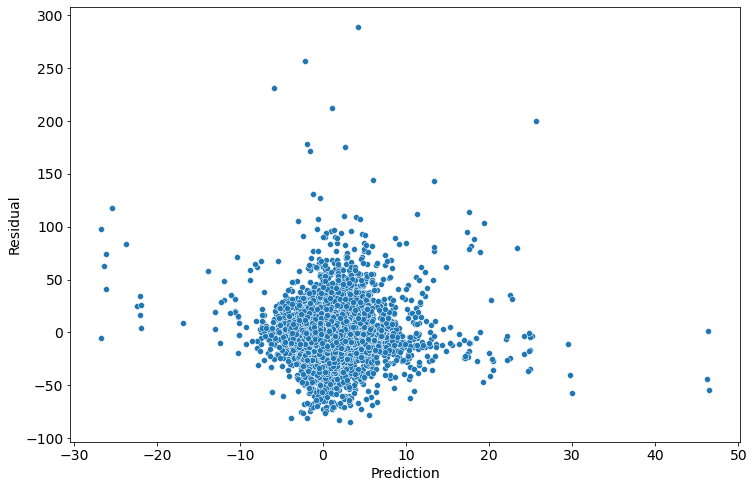

In [142]:

#print the scatter plot between residuals and predicitions
x='Prediction'
y='Residual'
sns.scatterplot(data=df_res, x=x, y=y)

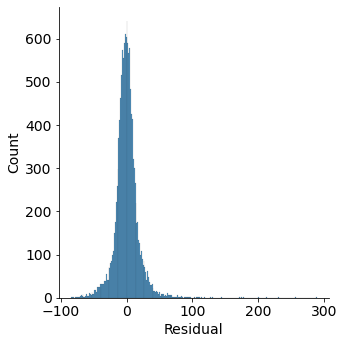

In [143]:
# histogram of the residual
sns.displot(df_res, x="Residual")

In [144]:
x=df_res['Residual']
pg.normality(x)

/usr/local/lib/python3.6/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


,W,pval,normal
Residual,0.885194,0.0,False


In [145]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [146]:
pg.pairwise_corr(df,columns=X.columns, method='pearson').round(3)

,X,Y,method,tail,n,r,CI95%,r2,adj_r2,z,p-unc,BF10,power
0,ESG_Score,GDWL,pearson,two-sided,13490,0.066,"[0.05, 0.08]",0.004,0.004,0.066,0.000,8.582e+10,1.000
1,ESG_Score,Intang_Other,pearson,two-sided,13490,-0.004,"[-0.02, 0.01]",0.000,-0.000,-0.004,0.609,0.012,0.080
2,ESG_Score,Intang_Ratio,pearson,two-sided,13490,0.133,"[0.12, 0.15]",0.018,0.018,0.134,0.000,1.494e+50,1.000
3,ESG_Score,Num_Analyst,pearson,two-sided,13490,0.224,"[0.21, 0.24]",0.050,0.050,0.228,0.000,2.515e+148,1.000
4,ESG_Score,BMR,pearson,two-sided,13490,-0.099,"[-0.12, -0.08]",0.010,0.010,-0.099,0.000,4.601e+26,1.000
5,ESG_Score,HML,pearson,two-sided,13490,-0.146,"[-0.16, -0.13]",0.021,0.021,-0.147,0.000,1.692e+61,1.000
6,ESG_Score,Mom,pearson,two-sided,13490,-0.009,"[-0.03, 0.01]",0.000,-0.000,-0.009,0.277,0.019,0.193
7,ESG_Score,SMB,pearson,two-sided,13490,-0.161,"[-0.18, -0.14]",0.026,0.026,-0.162,0.000,9.173e+74,1.000
8,ESG_Score,Sale,pearson,two-sided,13490,0.075,"[0.06, 0.09]",0.006,0.006,0.075,0.000,4.742e+14,1.000
9,ESG_Score,Total_Industry_Sale,pearson,two-sided,13490,-0.019,"[-0.04, -0.0]",0.000,0.000,-0.019,0.030,0.114,0.583


# Decision Tree

In [147]:
import pandas as pd 
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics 
clf = DecisionTreeClassifier()

In [148]:
df['Monthly_Return_Rank']=pd.qcut(df.Monthly_Return,2,labels=np.arange(1,3,1))
df.head()

,Monthly_Return,ESG_Score,GDWL,Intang_Other,Intang_Ratio,Num_Analyst,BMR,HML,Mom,SMB,Sale,Total_Industry_Sale,MktShare,Cash_STI,Asset,ROA,Cash_Dividend,Net_Income,LTDebt,STDebt,Inst_Owner,COGS,INVT,Invt_Turn,Industry_Adjusted_InvTurn,R_D,SGA,Cash,Share_Outstanding,Price_Close,Size,IdioRisk,Monthly_Return_Rank
0,0.081015,2.4,7.034,15.340,0.026169,4.0,-0.141200,-0.140407,-0.280740,-0.504838,544.543,90719.806,0.006002,9.335,854.988,0.084239,0.000,37.235,251.940,0.000,0.911848,428.594,0.000,0.000000,0.000000,0.0,290.397,9.335,9.284,102.26,949.38184,0.134737,2
1,-3.797472,2.5,3.244,0.390,0.002663,13.0,-0.447263,0.700125,-0.032356,0.443825,378.771,1595028.460,0.000237,180.202,1364.818,0.108639,0.000,171.957,153.166,0.000,0.974362,132.077,0.000,0.000000,0.000000,0.0,0.000,41.089,68.358,33.18,2268.11844,0.095876,1
2,7.395005,4.0,357.586,0.000,0.060498,8.0,0.075134,-0.237418,0.129247,-0.158067,1257.910,405761.071,0.003100,12.070,5910.702,0.032014,115.127,202.120,2253.023,3.855,0.987411,808.137,53.925,14.986314,0.986860,0.0,0.000,5.145,50.452,71.67,3615.89484,0.048562,2
3,-4.385382,4.3,774.791,332.008,0.310817,8.0,0.409873,-0.093515,-0.348365,0.999915,2689.308,614081.750,0.004379,400.154,3560.933,0.055641,0.000,41.301,1242.479,258.153,1.104333,2116.229,122.019,17.343438,3.829659,0.0,215.902,400.154,105.510,15.05,1587.92550,0.084532,1
4,-9.152436,0.6,0.000,146.414,0.010555,18.0,0.255493,-1.218142,-1.012745,0.151828,6611.099,28340.551,0.233273,2351.904,13871.281,0.031831,0.000,122.985,10256.924,342.933,0.733593,4067.053,88.519,45.945537,0.383312,0.0,1006.864,2351.904,107.364,138.87,14909.63868,0.098147,1


In [149]:
df['Monthly_Return_Rank']=df['Monthly_Return_Rank'].apply(lambda x: 'High' if x==2 else 'Low')

In [154]:
feature_names=['ESG_Score']
features=df[feature_names]
targets=df['Monthly_Return_Rank']
targets_names = targets.unique()

In [155]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.3, random_state=42)

In [156]:
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [157]:
#####Optimizing Decision Tree Performance
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='entropy', max_depth=2,random_state=0)

# Train Decision Tree Classifer
clf = clf.fit(train_features,train_targets)

#Predict the response for test dataset
y_pred = clf.predict(test_features)

# Compute test set accuracy  
acc = accuracy_score(y_pred, test_targets)
print("Test set accuracy: {:.2f}".format(acc))

Test set accuracy: 0.52


In [158]:

from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

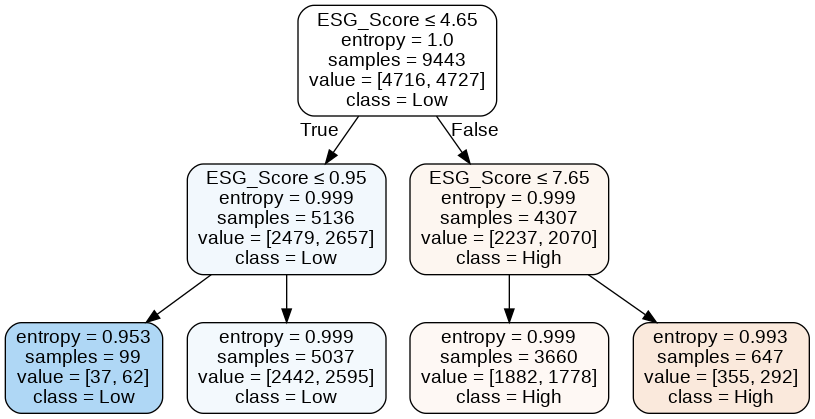

In [159]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_names,class_names=clf.classes_)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('ESG.png')
Image(graph.create_png())

# Random Forest and Feature Importance 
https://mljar.com/blog/feature-importance-in-random-forest/

In [160]:
# Let's load the packages
import numpy as np
import pandas as pd
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import permutation_importance
from matplotlib import pyplot as plt

plt.rcParams.update({'figure.figsize': (12.0, 8.0)})
plt.rcParams.update({'font.size': 14})

In [165]:
feature_names=X.columns
features=X
targets=df['Monthly_Return']
targets_names = targets.unique()

In [166]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_targets, test_targets = train_test_split(features, targets, test_size=0.3, random_state=42)

In [167]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train_features,train_targets)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [168]:
rf.feature_importances_

array([0.        , 0.01668049, 0.00977216, 0.01269576, 0.01837136,
       0.01652001, 0.13340592, 0.18480508, 0.13165589, 0.12197216,
       0.00936299, 0.01518339, 0.0162733 , 0.01685229, 0.01221812,
       0.03116838, 0.00115633, 0.01935922, 0.02573105, 0.01562397,
       0.02331742, 0.0106173 , 0.01218493, 0.01525599, 0.01096913,
       0.0058028 , 0.0121155 , 0.01228293, 0.01397467, 0.02972483,
       0.01764725, 0.02729937])

<BarContainer object of 32 artists>

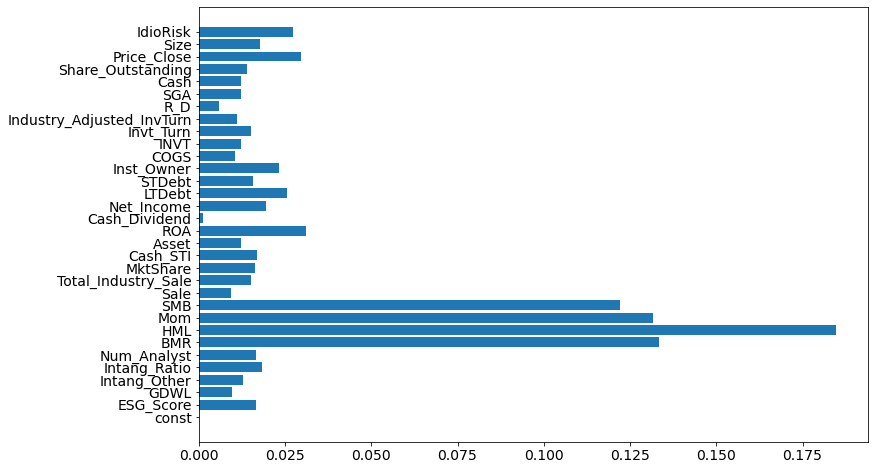

In [169]:
plt.barh(feature_names, rf.feature_importances_)

Text(0.5, 0, 'Random Forest Feature Importance')

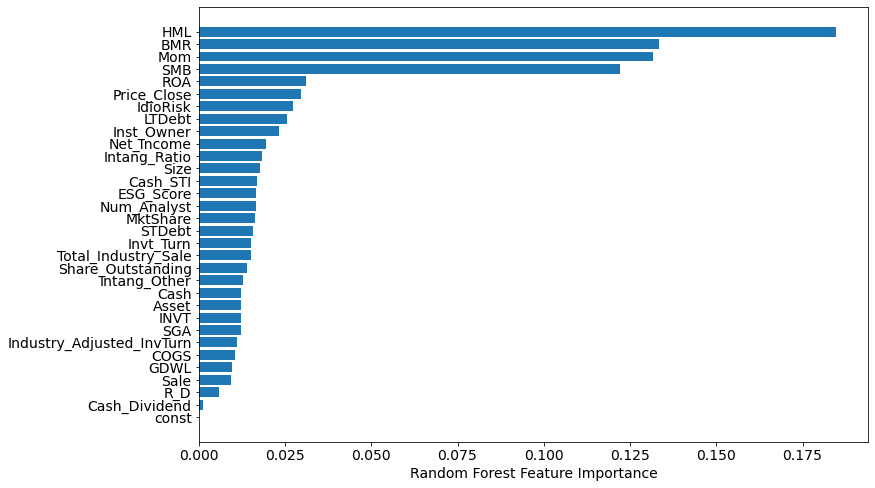

In [170]:
sorted_idx = rf.feature_importances_.argsort()
plt.barh(feature_names[sorted_idx], rf.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

In [171]:
perm_importance = permutation_importance(rf, test_features,test_targets)

Text(0.5, 0, 'Permutation Importance')

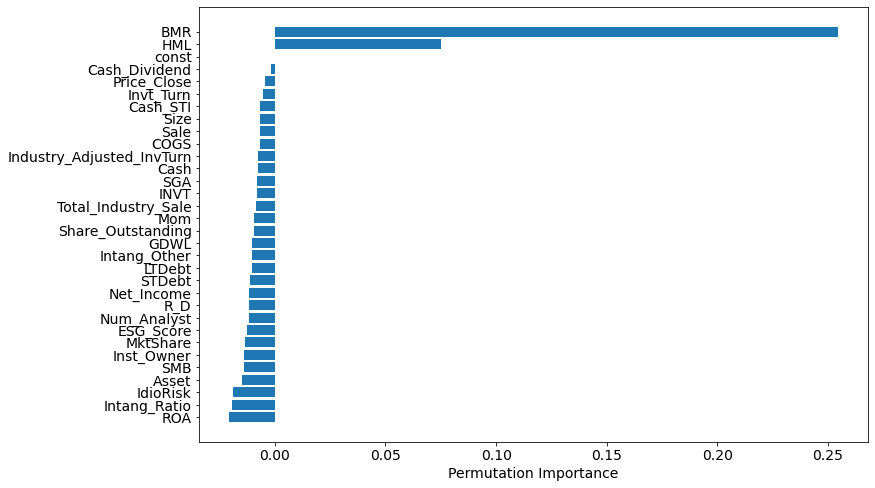

In [172]:
sorted_idx = perm_importance.importances_mean.argsort()
plt.barh(feature_names[sorted_idx], perm_importance.importances_mean[sorted_idx])
plt.xlabel("Permutation Importance")

In [176]:
pip install shap

     |████████████████████████████████| 358kB 9.6MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp36-cp36m-linux_x86_64.whl size=489397 sha256=67c7fb772c0bf01163b6e4eef009cc80a54f4a5733049ce94ae281030136730b
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap


In [177]:
import shap

In [ ]:
explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(test_features)

In [ ]:
shap.summary_plot(shap_values, test_features, plot_type="bar")

In [ ]:
shap.summary_plot(shap_values, test_features)